In [1]:
# Install required libraries (most are already in Colab)
!pip install plotly -q

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"📈 Scikit-learn imported successfully")

✅ All libraries imported successfully!
📊 Pandas version: 2.2.2
🔢 NumPy version: 2.0.2
📈 Scikit-learn imported successfully


In [2]:
import pandas as pd

# Load mall visitors data from CSV
# Please ensure 'mall_visitors.csv' is uploaded or provide the correct path.
try:
    data = pd.read_csv('mall_visitors.csv')
    print("✅ Dataset loaded successfully from 'mall_visitors.csv'!")
except FileNotFoundError:
    print("❌ Error: 'mall_visitors.csv' not found. Please upload the file to your Colab environment or provide the correct path.")
    print("Aborting data loading from CSV. Please resolve the file path issue.")
    raise FileNotFoundError("CSV file 'mall_visitors.csv' not found.")

# Shuffle the data (still relevant for loaded data)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n{'='*60}")
print(f"Dataset Shape: {data.shape}")
print(f"{'='*60}")
print("\n📋 First 10 Rows:")
print(data.head(10))

✅ Dataset loaded successfully from 'mall_visitors.csv'!

Dataset Shape: (200, 4)

📋 First 10 Rows:
   CustomerID  Age  AnnualIncome  SpendingScore
0          96   59         58360             89
1          16   39        106202             93
2          31   32         22911              8
3         159   18        129616             12
4         129   59         60818             23
5         116   54        106831             47
6          70   40         92694             99
7         171   59         83208             46
8         175   49        116752             81
9          46   45        132561             58


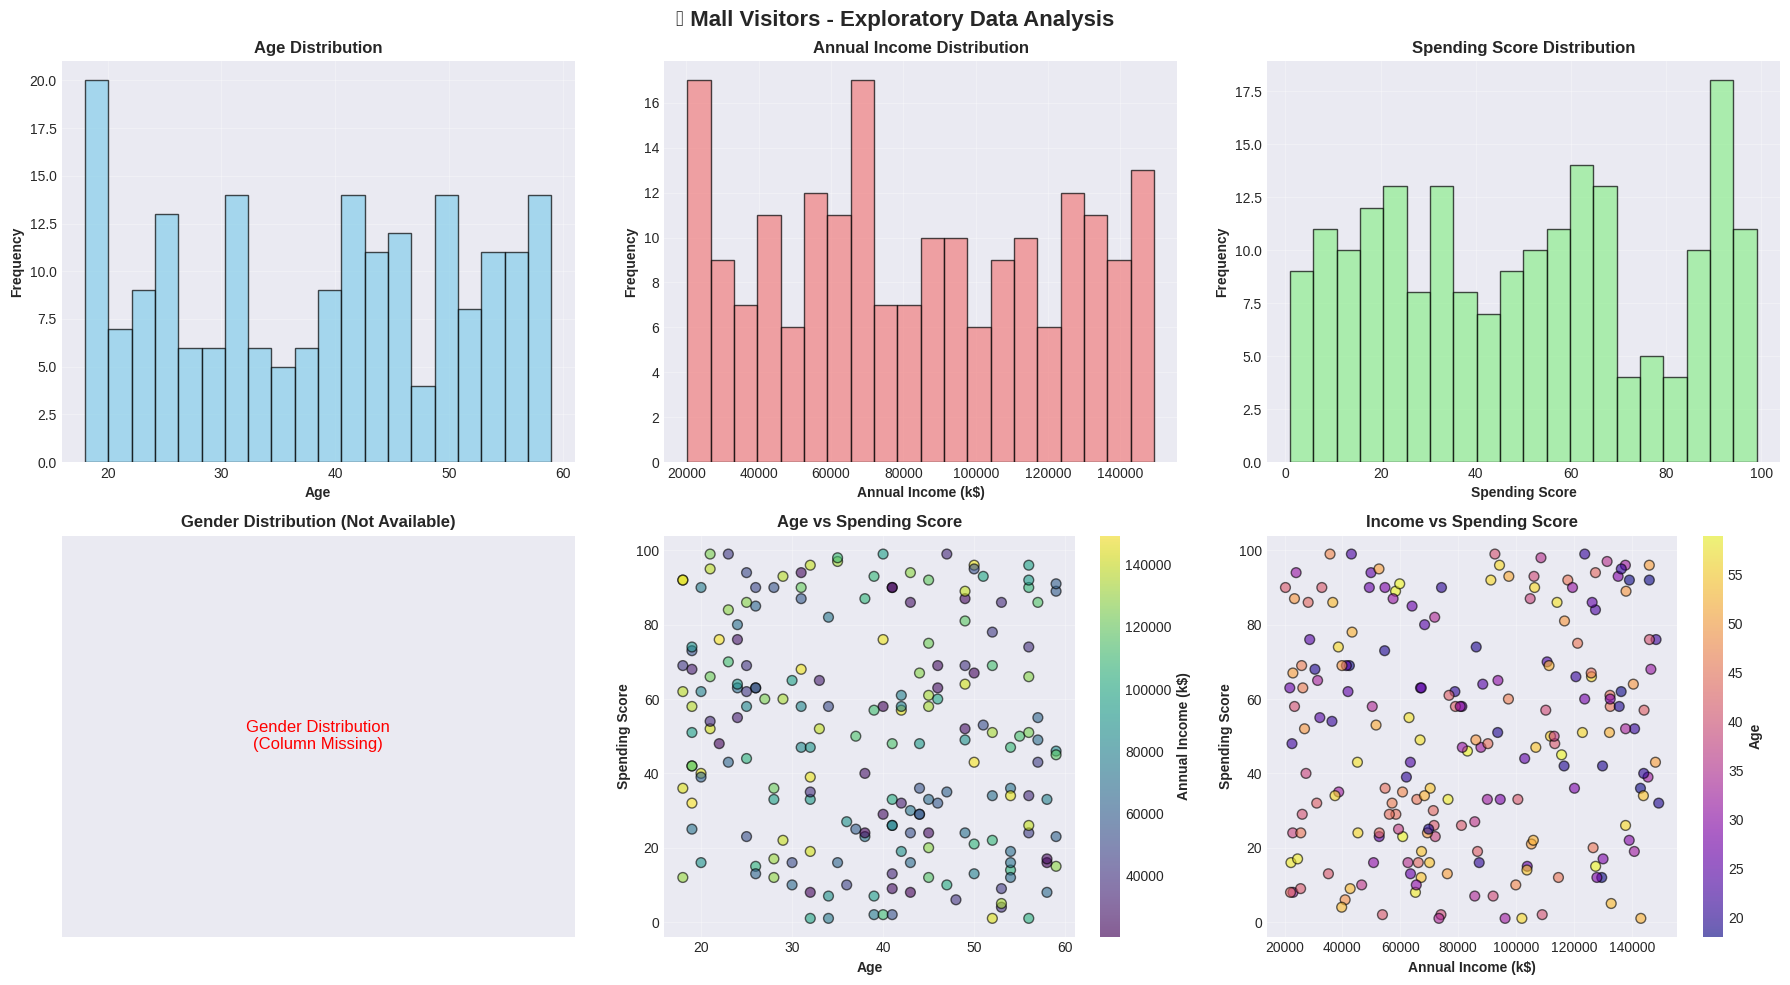

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create comprehensive EDA visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('🏪 Mall Visitors - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Age Distribution
axes[0, 0].hist(data['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Age', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3);

# 2. Annual Income Distribution
axes[0, 1].hist(data['AnnualIncome'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Annual Income Distribution', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Annual Income (k$)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3);

# 3. Spending Score Distribution
axes[0, 2].hist(data['SpendingScore'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Spending Score Distribution', fontweight='bold', fontsize=12)
axes[0, 2].set_xlabel('Spending Score', fontweight='bold')
axes[0, 2].set_ylabel('Frequency', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3);

# 4. Gender Distribution - REMOVED due to missing 'Gender' column
# gender_counts = data['Gender'].value_counts()
# axes[1, 0].bar(gender_counts.index, gender_counts.values, color=['#FF69B4', '#4169E1'], alpha=0.7, edgecolor='black')
axes[1, 0].text(0.5, 0.5, 'Gender Distribution\n(Column Missing)', horizontalalignment='center', verticalalignment='center', transform=axes[1, 0].transAxes, fontsize=12, color='red')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])
axes[1, 0].set_title('Gender Distribution (Not Available)', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
# axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Age vs Spending Score
scatter1 = axes[1, 1].scatter(data['Age'], data['SpendingScore'],
                              c=data['AnnualIncome'], cmap='viridis', alpha=0.6, s=50, edgecolors='black')
axes[1, 1].set_title('Age vs Spending Score', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Age', fontweight='bold')
axes[1, 1].set_ylabel('Spending Score', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter1, ax=axes[1, 1])
cbar.set_label('Annual Income (k$)', fontweight='bold')

# 6. Income vs Spending Score
scatter2 = axes[1, 2].scatter(data['AnnualIncome'], data['SpendingScore'],
                              c=data['Age'], cmap='plasma', alpha=0.6, s=50, edgecolors='black')
axes[1, 2].set_title('Income vs Spending Score', fontweight='bold', fontsize=12)
axes[1, 2].set_xlabel('Annual Income (k$)', fontweight='bold')
axes[1, 2].set_ylabel('Spending Score', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1, 2])
cbar2.set_label('Age', fontweight='bold')

plt.tight_layout()
plt.show()

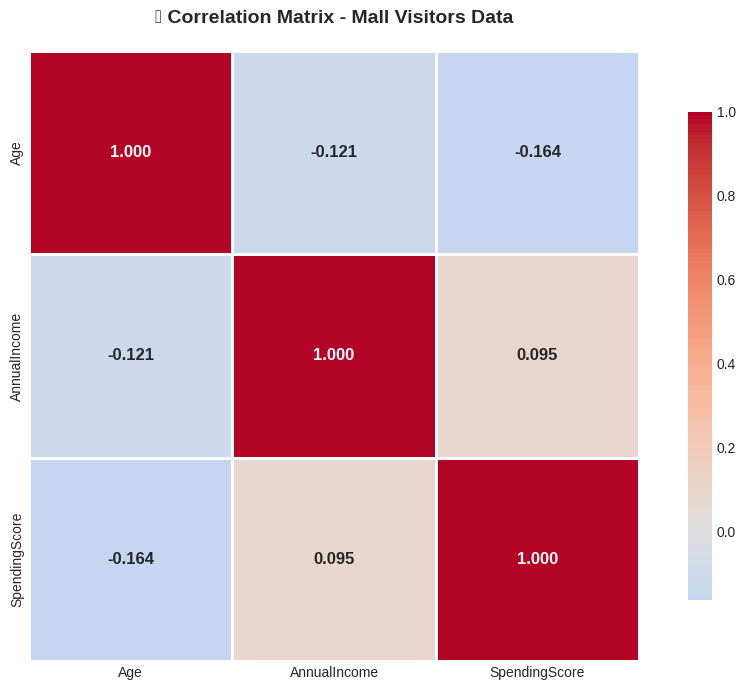


📊 CORRELATION MATRIX
                 Age  AnnualIncome  SpendingScore
Age            1.000        -0.121         -0.164
AnnualIncome  -0.121         1.000          0.095
SpendingScore -0.164         0.095          1.000


In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
correlation_matrix = data[['Age', 'AnnualIncome', 'SpendingScore']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 12, 'weight': 'bold'})
plt.title('🔗 Correlation Matrix - Mall Visitors Data', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"📊 CORRELATION MATRIX")
print(f"{'='*60}")
print(correlation_matrix.round(3))

In [8]:
# Select features for clustering
X = data[['AnnualIncome', 'SpendingScore']].values

print(f"{'='*60}")
print("🎯 FEATURE SELECTION")
print(f"{'='*60}")
print(f"Selected Features: Annual Income & Spending Score")
print(f"Feature Matrix Shape: {X.shape}")
print(f"Number of Samples: {X.shape[0]}")
print(f"Number of Features: {X.shape[1]}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n{'='*60}")
print("📏 FEATURE SCALING")
print(f"{'='*60}")
print("\n Original Data (first 5 samples):")
print(pd.DataFrame(X[:5], columns=['Annual Income', 'Spending Score']))
print("\n Scaled Data (first 5 samples):")
print(pd.DataFrame(X_scaled[:5], columns=['Annual Income (Scaled)', 'Spending Score (Scaled)']).round(3))
print("\n✅ Features standardized successfully!")

🎯 FEATURE SELECTION
Selected Features: Annual Income & Spending Score
Feature Matrix Shape: (200, 2)
Number of Samples: 200
Number of Features: 2

📏 FEATURE SCALING

 Original Data (first 5 samples):
   Annual Income  Spending Score
0          58360              89
1         106202              93
2          22911               8
3         129616              12
4          60818              23

 Scaled Data (first 5 samples):
   Annual Income (Scaled)  Spending Score (Scaled)
0                  -0.647                    1.351
1                   0.587                    1.488
2                  -1.560                   -1.425
3                   1.190                   -1.288
4                  -0.583                   -0.911

✅ Features standardized successfully!


🔄 Calculating optimal number of clusters...
This may take a few seconds...

✓ K=2: WCSS=241.08, Silhouette=0.3746
✓ K=3: WCSS=141.51, Silhouette=0.4233
✓ K=4: WCSS=95.37, Silhouette=0.4216
✓ K=5: WCSS=76.77, Silhouette=0.4347
✓ K=6: WCSS=61.42, Silhouette=0.4195
✓ K=7: WCSS=51.63, Silhouette=0.4123
✓ K=8: WCSS=42.61, Silhouette=0.4216
✓ K=9: WCSS=37.99, Silhouette=0.4114
✓ K=10: WCSS=33.85, Silhouette=0.4043


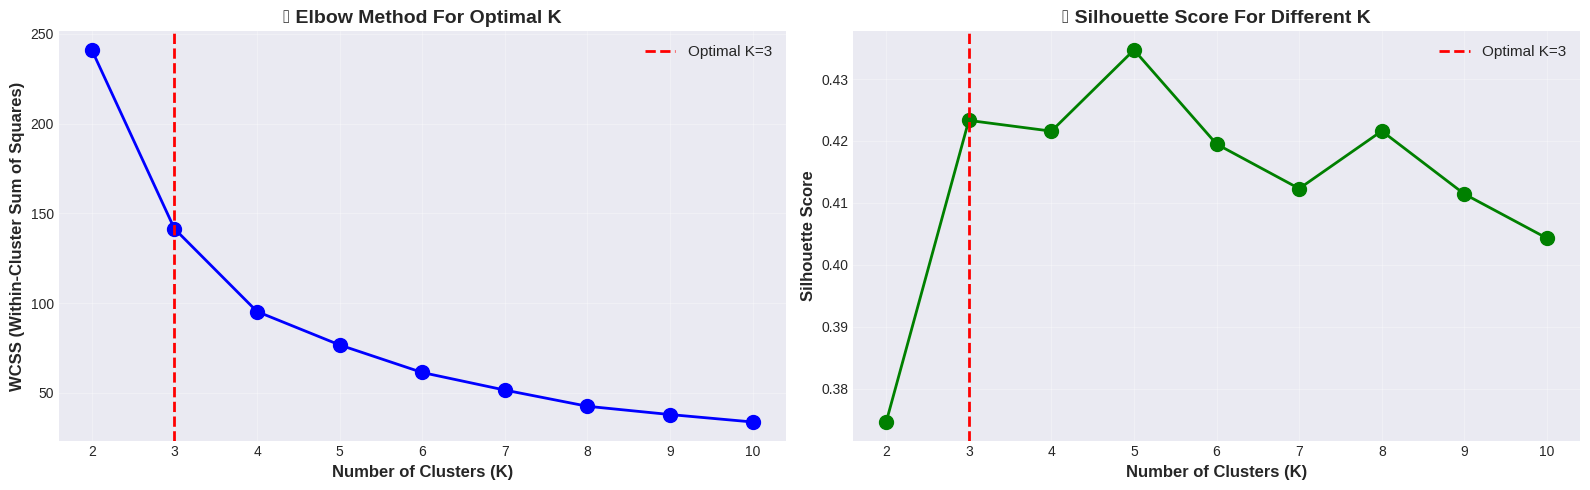


🎯 OPTIMAL K DETERMINATION
Based on Elbow Method and Silhouette Score:
✅ Optimal Number of Clusters: K = 3


In [9]:
# Calculate metrics for different K values
wcss = []
silhouette_scores = []
K_range = range(2, 11)

print("🔄 Calculating optimal number of clusters...")
print("This may take a few seconds...\n")

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"✓ K={k}: WCSS={kmeans.inertia_:.2f}, Silhouette={silhouette_score(X_scaled, kmeans.labels_):.4f}")

# Plot Elbow Curve and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Elbow Method
ax1.plot(K_range, wcss, 'bo-', linewidth=2, markersize=10)
ax1.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
ax1.set_title('📉 Elbow Method For Optimal K', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=3, color='red', linestyle='--', linewidth=2, label='Optimal K=3')
ax1.legend(fontsize=11)

# Silhouette Score
ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=10)
ax2.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('📊 Silhouette Score For Different K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=3, color='red', linestyle='--', linewidth=2, label='Optimal K=3')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("🎯 OPTIMAL K DETERMINATION")
print(f"{'='*60}")
print("Based on Elbow Method and Silhouette Score:")
print("✅ Optimal Number of Clusters: K = 3")

In [11]:
# Apply K-Means with optimal K=3
optimal_k = 3
print(f"{'='*60}")
print(f"🤖 APPLYING K-MEANS CLUSTERING (K={optimal_k})")
print(f"{'='*60}")

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
data['Cluster'] = clusters

# Map clusters to meaningful labels
cluster_means = data.groupby('Cluster')['SpendingScore'].mean().sort_values()
cluster_mapping = {
    cluster_means.index[0]: 'Low Spenders',
    cluster_means.index[1]: 'Medium Spenders',
    cluster_means.index[2]: 'High Spenders'
}
data['Segment'] = data['Cluster'].map(cluster_mapping)

print("\n✅ Clustering completed successfully!")
print(f"\n{'='*60}")
print("📍 CLUSTER CENTERS (Original Scale)")
print(f"{'='*60}")
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers_original,
                         columns=['Annual Income (k$)', 'Spending Score'],
                         index=['Cluster 0', 'Cluster 1', 'Cluster 2'])
print(centers_df.round(2))

print(f"\n{'='*60}")
print("📊 SEGMENT DISTRIBUTION")
print(f"{'='*60}")
segment_counts = data['Segment'].value_counts()
for segment, count in segment_counts.items():
    print(f"{segment}: {count} customers ({count/len(data)*100:.1f}%)")

🤖 APPLYING K-MEANS CLUSTERING (K=3)

✅ Clustering completed successfully!

📍 CLUSTER CENTERS (Original Scale)
           Annual Income (k$)  Spending Score
Cluster 0            46492.69           71.71
Cluster 1            72133.15           20.82
Cluster 2           123877.94           66.59

📊 SEGMENT DISTRIBUTION
Low Spenders: 80 customers (40.0%)
Medium Spenders: 69 customers (34.5%)
High Spenders: 51 customers (25.5%)


In [13]:
print(f"\n{'='*70}")
print("📊 DETAILED CLUSTER PROFILING & ANALYSIS")
print(f"{'='*70}")

if 'Segment' not in data.columns:
    print("❌ Error: 'Segment' column not found. Please run the K-Means clustering cell (the one that applies KMeans and assigns segments) first.")
else:
    for segment in ['Low Spenders', 'Medium Spenders', 'High Spenders']:
        cluster_data = data[data['Segment'] == segment]

        print(f"\n{'='*70}")
        print(f"{'  ' + segment.upper() + '  ':^70}")
        print(f"{'='*70}")

        print(f"\n📈 SIZE & DISTRIBUTION")
        print(f"  • Total Customers: {len(cluster_data)}")
        print(f"  • Percentage of Total: {len(cluster_data)/len(data)*100:.1f}%")

        print(f"\n👤 AGE STATISTICS")
        print(f"  • Mean Age: {cluster_data['Age'].mean():.1f} years")
        print(f"  • Median Age: {cluster_data['Age'].median():.1f} years")
        print(f"  • Age Range: {cluster_data['Age'].min()}-{cluster_data['Age'].max()} years")
        print(f"  • Std Deviation: {cluster_data['Age'].std():.1f}")

        print(f"\n💰 ANNUAL INCOME STATISTICS")
        print(f"  • Mean Income: ${cluster_data['AnnualIncome'].mean():.1f}")
        print(f"  • Median Income: ${cluster_data['AnnualIncome'].median():.1f}")
        print(f"  • Income Range: ${cluster_data['AnnualIncome'].min()} - ${cluster_data['AnnualIncome'].max()}")
        print(f"  • Std Deviation: ${cluster_data['AnnualIncome'].std():.1f}")

        print(f"\n🛍️ SPENDING SCORE STATISTICS")
        print(f"  • Mean Score: {cluster_data['SpendingScore'].mean():.1f}")
        print(f"  • Median Score: {cluster_data['SpendingScore'].median():.1f}")
        print(f"  • Score Range: {cluster_data['SpendingScore'].min()}-{cluster_data['SpendingScore'].max()}")
        print(f"  • Std Deviation: {cluster_data['SpendingScore'].std():.1f}")

        # Removed GENDER DISTRIBUTION section due to absence of 'Gender' column in provided data.
        # male_count = (cluster_data['Gender']=='Male').sum()
        # female_count = (cluster_data['Gender']=='Female').sum()
        # print(f"\n👥 GENDER DISTRIBUTION")
        # print(f"  • Male: {male_count} ({male_count/len(cluster_data)*100:.1f}%))")
        # print(f"  • Female: {female_count} ({female_count/len(cluster_data)*100:.1f}%))")

    print(f"\n{'='*70}")
    print("📋 SUMMARY TABLE BY SEGMENT")
    print(f"{'='*70}")
    summary = data.groupby('Segment').agg({
        'Age': ['mean', 'std'],
        'AnnualIncome': ['mean', 'std'],
        'SpendingScore': ['mean', 'std'],
        'CustomerID': 'count'
    }).round(2)
    summary.columns = ['Age_Mean', 'Age_Std', 'Income_Mean', 'Income_Std',
                       'Spending_Mean', 'Spending_Std', 'Count']
    print(summary)


📊 DETAILED CLUSTER PROFILING & ANALYSIS

                             LOW SPENDERS                             

📈 SIZE & DISTRIBUTION
  • Total Customers: 80
  • Percentage of Total: 40.0%

👤 AGE STATISTICS
  • Mean Age: 42.0 years
  • Median Age: 43.0 years
  • Age Range: 18-59 years
  • Std Deviation: 10.9

💰 ANNUAL INCOME STATISTICS
  • Mean Income: $72133.1
  • Median Income: $69594.0
  • Income Range: $22049 - $143133
  • Std Deviation: $29745.6

🛍️ SPENDING SCORE STATISTICS
  • Mean Score: 20.8
  • Median Score: 19.5
  • Score Range: 1-49
  • Std Deviation: 12.7

                           MEDIUM SPENDERS                            

📈 SIZE & DISTRIBUTION
  • Total Customers: 69
  • Percentage of Total: 34.5%

👤 AGE STATISTICS
  • Mean Age: 36.4 years
  • Median Age: 35.0 years
  • Age Range: 18-59 years
  • Std Deviation: 13.4

💰 ANNUAL INCOME STATISTICS
  • Mean Income: $123877.9
  • Median Income: $126081.0
  • Income Range: $86235 - $149307
  • Std Deviation: $17569.6

🛍️ S

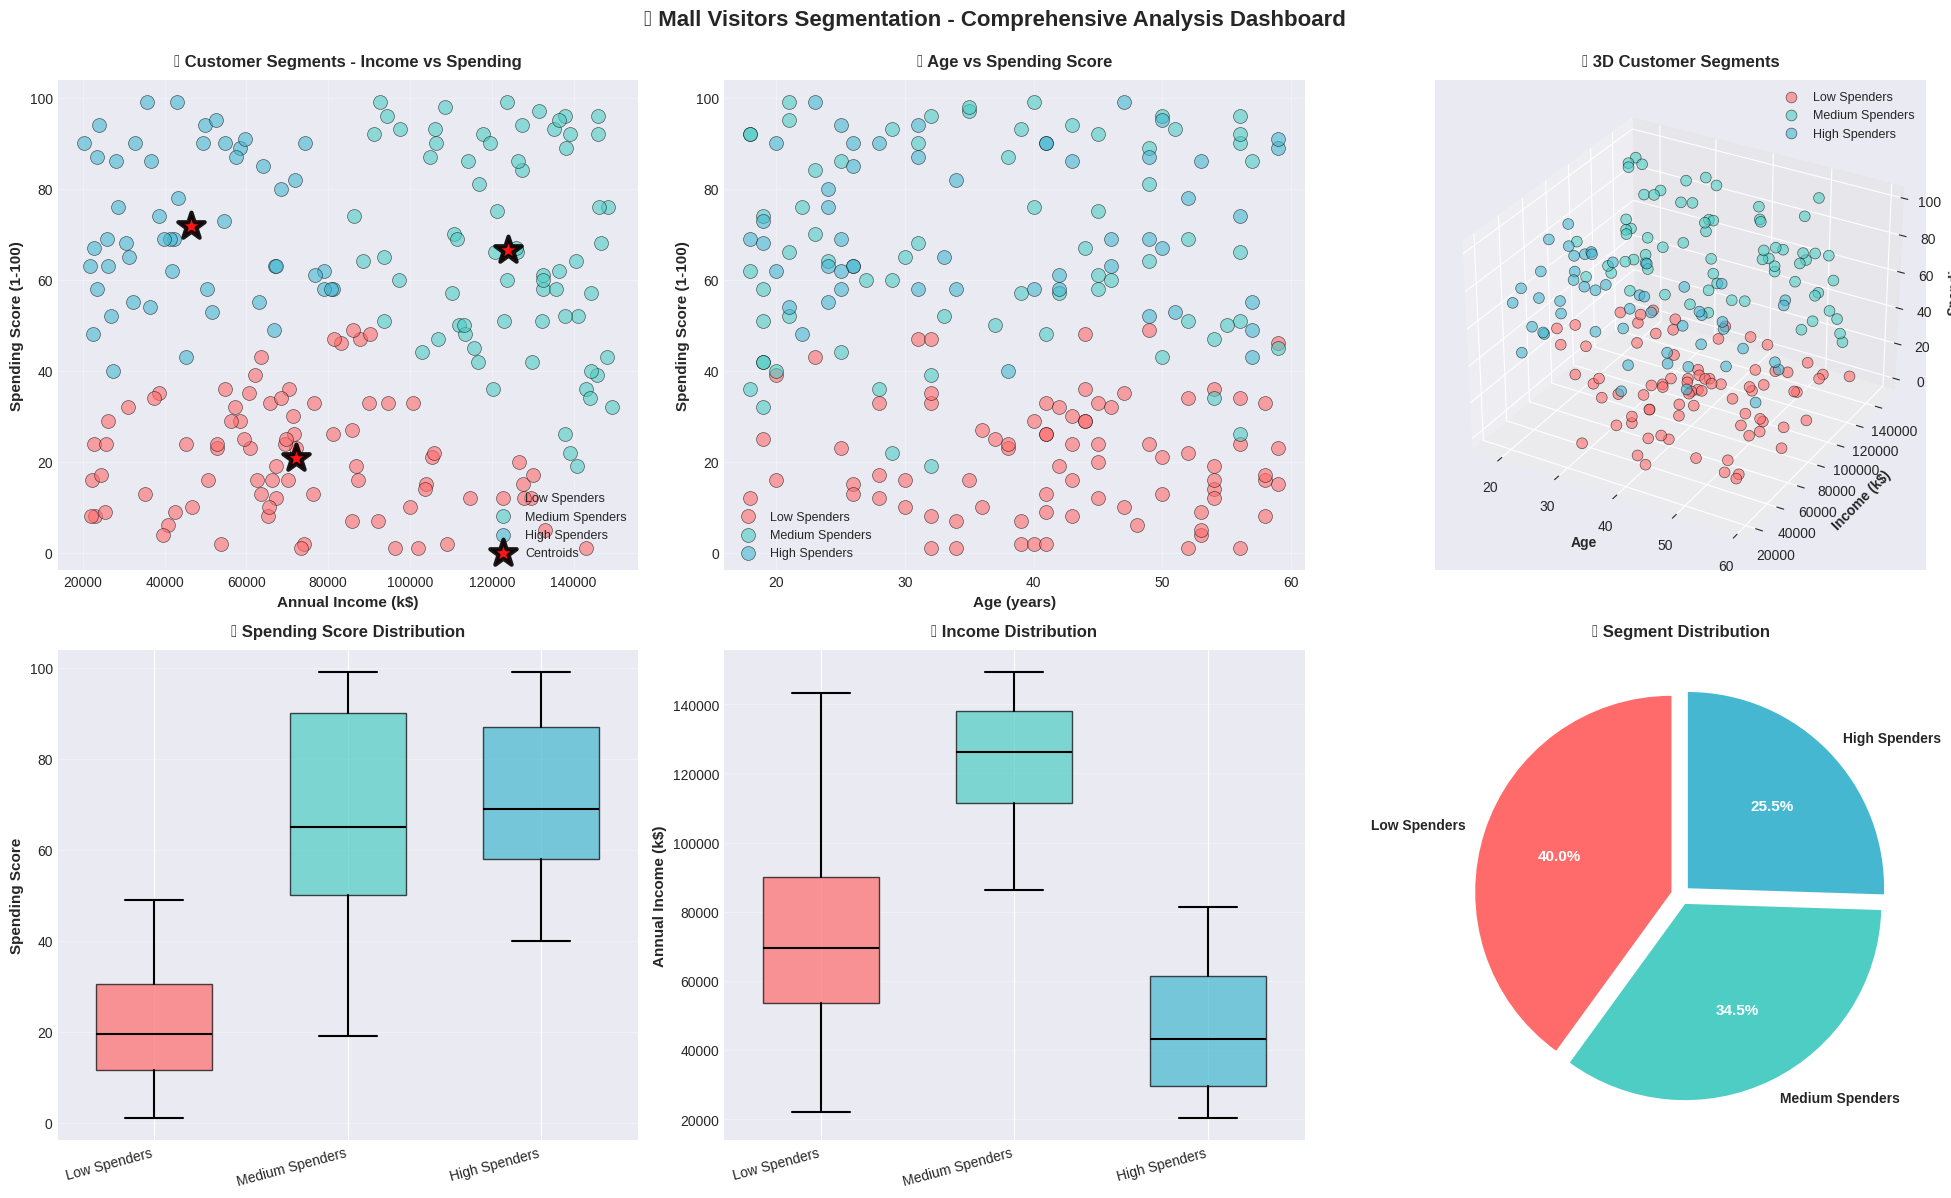

In [15]:
# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
segment_order = ['Low Spenders', 'Medium Spenders', 'High Spenders']

# 1. Main Cluster Plot (Income vs Spending Score)
ax1 = plt.subplot(2, 3, 1)
for idx, segment in enumerate(segment_order):
    cluster_data = data[data['Segment'] == segment]
    ax1.scatter(cluster_data['AnnualIncome'],
               cluster_data['SpendingScore'],
               c=colors[idx], label=segment, alpha=0.6, s=100, edgecolors='black', linewidth=0.5)

centers = scaler.inverse_transform(kmeans.cluster_centers_)
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=400, alpha=0.9,
           edgecolors='black', linewidths=3, marker='*', label='Centroids', zorder=5)
ax1.set_xlabel('Annual Income (k$)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Spending Score (1-100)', fontsize=11, fontweight='bold')
ax1.set_title('🎯 Customer Segments - Income vs Spending', fontsize=12, fontweight='bold', pad=10)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Age vs Spending Score
ax2 = plt.subplot(2, 3, 2)
for idx, segment in enumerate(segment_order):
    cluster_data = data[data['Segment'] == segment]
    ax2.scatter(cluster_data['Age'], cluster_data['SpendingScore'],
               c=colors[idx], label=segment, alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Age (years)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Spending Score (1-100)', fontsize=11, fontweight='bold')
ax2.set_title('👤 Age vs Spending Score', fontsize=12, fontweight='bold', pad=10)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. 3D Scatter Plot
ax3 = plt.subplot(2, 3, 3, projection='3d')
for idx, segment in enumerate(segment_order):
    cluster_data = data[data['Segment'] == segment]
    ax3.scatter(cluster_data['Age'],
               cluster_data['AnnualIncome'],
               cluster_data['SpendingScore'],
               c=colors[idx], label=segment, alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Age', fontweight='bold', fontsize=10)
ax3.set_ylabel('Income (k$)', fontweight='bold', fontsize=10)
ax3.set_zlabel('Spending', fontweight='bold', fontsize=10)
ax3.set_title('📊 3D Customer Segments', fontsize=12, fontweight='bold', pad=10)
ax3.legend(fontsize=9)

# 4. Box Plot - Spending Score
ax4 = plt.subplot(2, 3, 4)
box_data = [data[data['Segment']==seg]['SpendingScore'].values
            for seg in segment_order]
bp = ax4.boxplot(box_data, labels=segment_order, patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black', linewidth=1.5)
ax4.set_ylabel('Spending Score', fontsize=11, fontweight='bold')
ax4.set_title('📦 Spending Score Distribution', fontsize=12, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3, axis='y')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=15, ha='right')

# 5. Box Plot - Annual Income
ax5 = plt.subplot(2, 3, 5)
income_data = [data[data['Segment']==seg]['AnnualIncome'].values
               for seg in segment_order]
bp2 = ax5.boxplot(income_data, labels=segment_order, patch_artist=True, widths=0.6)
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp2[element], color='black', linewidth=1.5)
ax5.set_ylabel('Annual Income (k$)', fontsize=11, fontweight='bold')
ax5.set_title('💰 Income Distribution', fontsize=12, fontweight='bold', pad=10)
ax5.grid(True, alpha=0.3, axis='y')
plt.setp(ax5.xaxis.get_majorticklabels(), rotation=15, ha='right')

# 6. Pie Chart
ax6 = plt.subplot(2, 3, 6)
segment_counts = data['Segment'].value_counts()[segment_order]
wedges, texts, autotexts = ax6.pie(segment_counts, labels=segment_order, autopct='%1.1f%%',
                                     colors=colors, startangle=90, explode=(0.05, 0.05, 0.05),
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
ax6.set_title('🥧 Segment Distribution', fontsize=12, fontweight='bold', pad=10)

plt.suptitle('🏪 Mall Visitors Segmentation - Comprehensive Analysis Dashboard',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [22]:
print(f"\n{'='*70}")
print("🤖 INTERACTIVE CUSTOMER SEGMENT PREDICTION TOOL")
print(f"{'='*70}")

def predict_customer_segment():
    try:
        # 1. Prompt for input
        annual_income = float(input("Enter Annual Income (k$): "))
        spending_score = float(input("Enter Spending Score (1-100): "))

        # 3. Create a NumPy array for the new customer data
        new_customer_data = np.array([[annual_income, spending_score]])

        # 4. Scale the input values
        scaled_customer_data = scaler.transform(new_customer_data)

        # 5. Predict the cluster
        predicted_cluster_id = kmeans.predict(scaled_customer_data)[0]

        # 6. Retrieve the segment name
        predicted_segment = cluster_mapping[predicted_cluster_id]

        # 7. Print the predicted segment
        print(f"\nPrediction for customer with Income ${annual_income:.1f}k and Spending Score {spending_score:.1f}:")
        print(f"✅ Predicted Customer Segment: {predicted_segment}")

    except ValueError:
        print("Invalid input. Please enter numeric values for Annual Income and Spending Score.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the prediction tool
predict_customer_segment()

print(f"\n{'='*70}")
print("💡 You can run predict_customer_segment() again to test with new values.")
print(f"{'='*70}")


🤖 INTERACTIVE CUSTOMER SEGMENT PREDICTION TOOL
Enter Annual Income (k$): 100000
Enter Spending Score (1-100): 50

Prediction for customer with Income $100000.0k and Spending Score 50.0:
✅ Predicted Customer Segment: Medium Spenders

💡 You can run predict_customer_segment() again to test with new values.
